In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.style.use('classic')

In [2]:
df_1m = pd.read_csv("datasets/Binance_BTCUSDT_minute.csv", header=1, sep=',')
df_1m.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount
0,1639013700000,2021-12-09 01:35:00,BTC/USDT,50335.98,50336.82,50302.00,50316.81,15.37366,7.735759e+05,339
1,1639013640000,2021-12-09 01:34:00,BTC/USDT,50307.78,50335.99,50289.61,50335.99,19.83926,9.980327e+05,447
2,1639013580000,2021-12-09 01:33:00,BTC/USDT,50344.19,50344.19,50293.04,50307.79,21.15830,1.064747e+06,500
3,1639013520000,2021-12-09 01:32:00,BTC/USDT,50331.69,50356.02,50329.27,50344.19,9.83088,4.949515e+05,367
4,1639013460000,2021-12-09 01:31:00,BTC/USDT,50350.22,50364.24,50331.69,50331.70,16.33132,8.222242e+05,445


In [3]:
df_1m['datetime'] = pd.to_datetime(df_1m['unix'], unit='ms')
df_1m.sort_values(by="datetime", inplace=True, ascending=True)
df_1m.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount,datetime
1178729,1567965420000,2019-09-08 17:57:00,BTC/USDT,10000.0,10000.0,10000.0,10000.0,0.001,10.0,1,2019-09-08 17:57:00
1178728,1567965480000,2019-09-08 17:58:00,BTC/USDT,10000.0,10000.0,10000.0,10000.0,0.000,0.0,0,2019-09-08 17:58:00
1178727,1567965540000,2019-09-08 17:59:00,BTC/USDT,10000.0,10000.0,10000.0,10000.0,0.001,10.0,1,2019-09-08 17:59:00
1178726,1567965600000,2019-09-08 18:00:00,BTC/USDT,10000.0,10000.0,10000.0,10000.0,0.000,0.0,0,2019-09-08 18:00:00
1178725,1567965660000,2019-09-08 18:01:00,BTC/USDT,10000.0,10000.0,10000.0,10000.0,0.000,0.0,0,2019-09-08 18:01:00


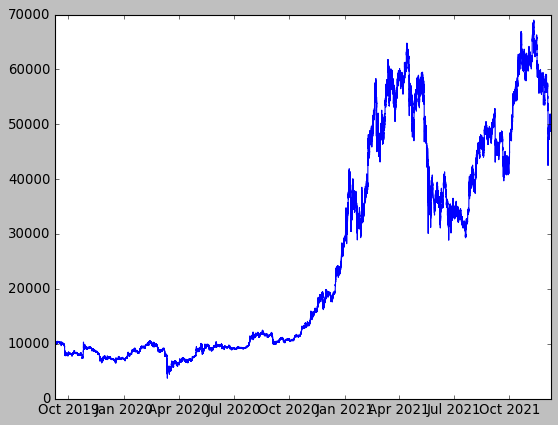

In [4]:
plt.plot(df_1m['datetime'], df_1m['close'])
plt.show()

In [5]:
df_1m['return'] = np.log(df_1m['close']).diff()
df_1m = df_1m.dropna()
df_1m.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount,datetime,return
1178728,1567965480000,2019-09-08 17:58:00,BTC/USDT,10000.0,10000.0,10000.0,10000.0,0.000,0.0,0,2019-09-08 17:58:00,0.0
1178727,1567965540000,2019-09-08 17:59:00,BTC/USDT,10000.0,10000.0,10000.0,10000.0,0.001,10.0,1,2019-09-08 17:59:00,0.0
1178726,1567965600000,2019-09-08 18:00:00,BTC/USDT,10000.0,10000.0,10000.0,10000.0,0.000,0.0,0,2019-09-08 18:00:00,0.0
1178725,1567965660000,2019-09-08 18:01:00,BTC/USDT,10000.0,10000.0,10000.0,10000.0,0.000,0.0,0,2019-09-08 18:01:00,0.0
1178724,1567965720000,2019-09-08 18:02:00,BTC/USDT,10000.0,10000.0,10000.0,10000.0,0.000,0.0,0,2019-09-08 18:02:00,0.0


In [6]:
df_1m['real_var'] = np.square(df_1m['return']).rolling(60).sum() * (60/61) * ((365*1440)/60)
df_1m['rv'] = np.sqrt(df_1m['real_var'])
df_1m

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount,datetime,return,real_var,rv
1178728,1567965480000,2019-09-08 17:58:00,BTC/USDT,10000.00,10000.00,10000.00,10000.00,0.00000,0.000000e+00,0,2019-09-08 17:58:00,0.000000,NaN,NaN
1178727,1567965540000,2019-09-08 17:59:00,BTC/USDT,10000.00,10000.00,10000.00,10000.00,0.00100,1.000000e+01,1,2019-09-08 17:59:00,0.000000,NaN,NaN
1178726,1567965600000,2019-09-08 18:00:00,BTC/USDT,10000.00,10000.00,10000.00,10000.00,0.00000,0.000000e+00,0,2019-09-08 18:00:00,0.000000,NaN,NaN
1178725,1567965660000,2019-09-08 18:01:00,BTC/USDT,10000.00,10000.00,10000.00,10000.00,0.00000,0.000000e+00,0,2019-09-08 18:01:00,0.000000,NaN,NaN
1178724,1567965720000,2019-09-08 18:02:00,BTC/USDT,10000.00,10000.00,10000.00,10000.00,0.00000,0.000000e+00,0,2019-09-08 18:02:00,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,1639013460000,2021-12-09 01:31:00,BTC/USDT,50350.22,50364.24,50331.69,50331.70,16.33132,8.222242e+05,445,2021-12-09 01:31:00,-0.000368,0.246048,0.496032
3,1639013520000,2021-12-09 01:32:00,BTC/USDT,50331.69,50356.02,50329.27,50344.19,9.83088,4.949515e+05,367,2021-12-09 01:32:00,0.000248,0.246578,0.496566
2,1639013580000,2021-12-09 01:33:00,BTC/USDT,50344.19,50344.19,50293.04,50307.79,21.15830,1.064747e+06,500,2021-12-09 01:33:00,-0.000723,0.250874,0.500874
1,1639013640000,2021-12-09 01:34:00,BTC/USDT,50307.78,50335.99,50289.61,50335.99,19.83926,9.980327e+05,447,2021-12-09 01:34:00,0.000560,0.249389,0.499388


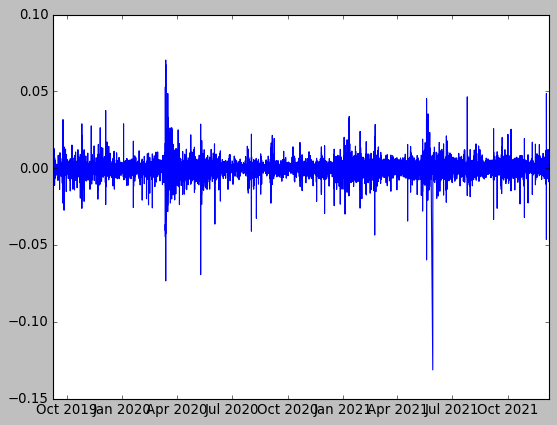

In [7]:
plt.plot(df_1m['datetime'], df_1m['return'])
plt.show()

In [8]:
df_vol = (df_1m[['datetime', 'rv']].set_index('datetime')
                                    .groupby(pd.Grouper(freq='d'))
                                    .mean()
                                    .dropna())
df_vol.head()

,rv
datetime,
2019-09-08,0.802524
2019-09-09,0.503743
2019-09-10,0.477289
2019-09-11,0.470619
2019-09-12,0.357450


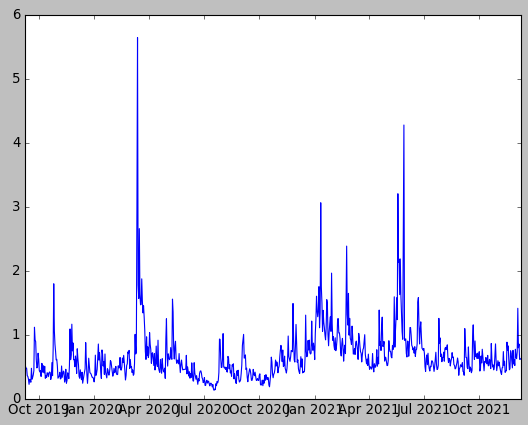

In [9]:
plt.plot(df_vol['rv'], label='annualized volatility')
plt.show()

In [10]:
df_daily_price = (df_1m[['datetime', 'close']].set_index('datetime')
                                    .groupby(pd.Grouper(freq='d'))
                                    .mean()
                                    .dropna())
df_daily_price.head()

,close
datetime,
2019-09-08,10290.310194
2019-09-09,10299.879771
2019-09-10,10224.414965
2019-09-11,10071.423250
2019-09-12,10216.206507


In [11]:
df_daily_price['log_return'] = np.log(df_daily_price['close']).diff()
df_daily_price.dropna()
df_daily_price.head()

,close,log_return
datetime,,
2019-09-08,10290.310194,NaN
2019-09-09,10299.879771,0.000930
2019-09-10,10224.414965,-0.007354
2019-09-11,10071.423250,-0.015076
2019-09-12,10216.206507,0.014273


In [12]:
df = pd.merge(df_vol, df_daily_price, on='datetime', how='inner')
df.head()

,rv,close,log_return
datetime,,,
2019-09-08,0.802524,10290.310194,NaN
2019-09-09,0.503743,10299.879771,0.000930
2019-09-10,0.477289,10224.414965,-0.007354
2019-09-11,0.470619,10071.423250,-0.015076
2019-09-12,0.357450,10216.206507,0.014273


In [13]:
df.to_csv('./outs/bitcoin_historical_vol.csv')